In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
#pz_only = 1,25 + 25,50
pz1 = None
with open('/home/rt2122/Data/scans_old/pz_only.ep1-25.history', 'rb') as f:
    pz1 = pickle.load(f)
pz2 = None
with open('/home/rt2122/Data/scans_old/pz_only.ep26-50.history', 'rb') as f:
    pz2 = pickle.load(f)
for key in pz1:
    pz1[key].extend(pz2[key])
with open('/home/rt2122/Data/scans_old/pz_only.ep1-50.history', 'wb') as f:
    pickle.dump(pz1, f)

In [3]:
pz_act = None
with open('/home/rt2122/Data/scans_old/act_ros.ep1-50.history', 'rb') as f:
    pz_act = pickle.load(f)
pz = None
with open('/home/rt2122/Data/scans_old/pz_only.ep1-50.history', 'rb') as f:
    pz = pickle.load(f)

In [4]:
pz['name'] = 'pz_model'
pz_act['name'] = 'pz_act_model'

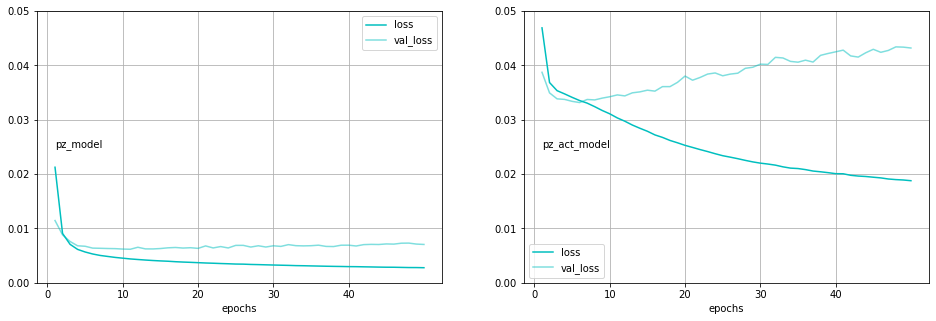

In [18]:
epochs = len(pz_act['loss'])
_, ax = plt.subplots(1, 2, figsize=(16, 5))
for i, hist in enumerate([pz, pz_act]):
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['loss'], c='c')
    line.set_label('loss')
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['val_loss'], c='c', alpha=0.5)
    line.set_label('val_loss')
    ax[i].set_xlabel('epochs')
    ax[i].text(1, 0.025, hist['name'])
    ax[i].set_yticks(np.arange(0, 0.06, 0.01))
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].grid()
    ax[i].legend()
plt.show()

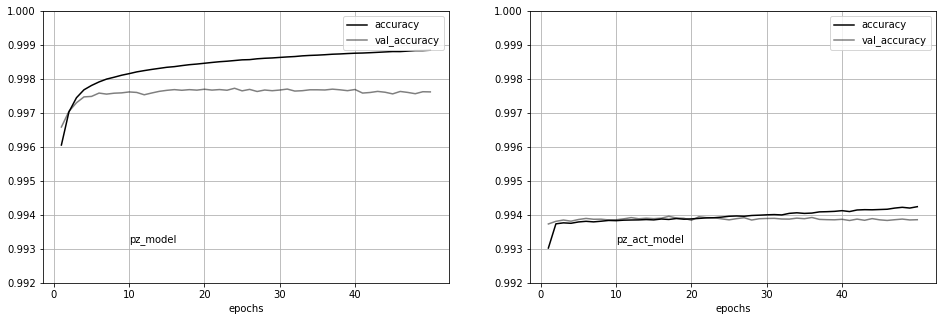

In [34]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
for i, hist in enumerate([pz, pz_act]):
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['accuracy'], c='k')
    line.set_label('accuracy')
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['val_accuracy'], c='k', alpha=0.5)
    line.set_label('val_accuracy')
    ax[i].set_xlabel('epochs')
    ax[i].text(10, 0.9932, hist['name'])
    ax[i].set_yticks(np.arange(0.992, 1, 0.001))
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].grid()
    ax[i].legend()

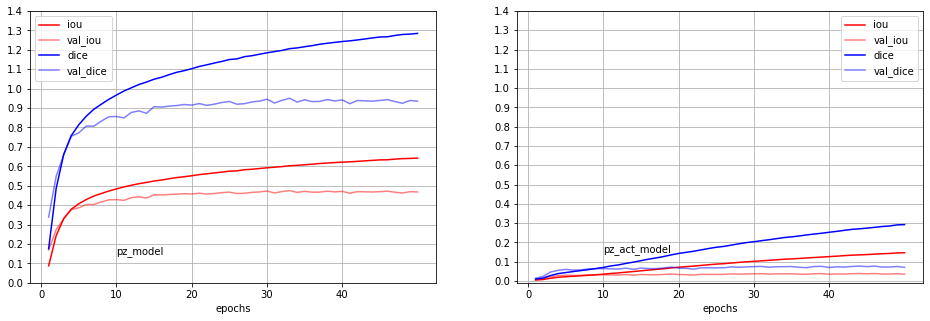

In [37]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))
for i, hist in enumerate([pz, pz_act]):
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['iou'], c='r')
    line.set_label('iou')
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['val_iou'], c='r', alpha=0.5)
    line.set_label('val_iou')
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['dice'], c='b')
    line.set_label('dice')
    line, = ax[i].plot(np.arange(1, epochs + 1), hist['val_dice'], c='b', alpha=0.5)
    line.set_label('val_dice')
    ax[i].set_xlabel('epochs')
    ax[i].text(10, 0.15, hist['name'])
    ax[i].set_yticks(np.arange(0, 1.5, 0.1))
    ax[i].set_xticks(np.arange(0, 50, 10))
    ax[i].grid()
    ax[i].legend()